# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Car dealerships aim to maximize profitability by optimizing inventory churn and 
pricing used vehicles effectively. Accurate pricing requires understanding the 
factors influencing vehicle value to balance quick sales and revenue. 

By analyzing past transactions, a regression-based approach will be used to predict optimal prices. 
The project involves data exploration, cleaning, and feature engineering, followed by building predictive 
models using linear and polynomial regression, feature selection, and ridge regression to provide 
actionable insights for pricing strategies.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [4]:
# Import all the required libararies
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso, ARDRegression, BayesianRidge
from sklearn.datasets import make_regression
from sklearn.kernel_ridge import KernelRidge 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
import io

In [7]:
# Loading the data
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

There are around 18 features inluding the ID about the car

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [9]:
unique = df.nunique(axis = 0)
unique

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [10]:


df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
df.isna().sum()/df.shape[0]*100

id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64

There are signifcant data with null data

In [11]:
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print('\n-----------\n')
    print(df_[col].nunique())
    print(df_[col].unique()) 
    print(df_[col].value_counts()) 


-----------

404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colora

In [12]:
def random_sampling(df, n):
    random_sample = np.random.choice(df,replace = False, size = n)
    return(random_sample)
RandomSample = random_sampling(df['model'], 100)
RandomSample

df1 = df.drop(columns=['model','size','id','VIN'], axis=1)
df1.reset_index(inplace=True, drop = True)
df1


,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset')]

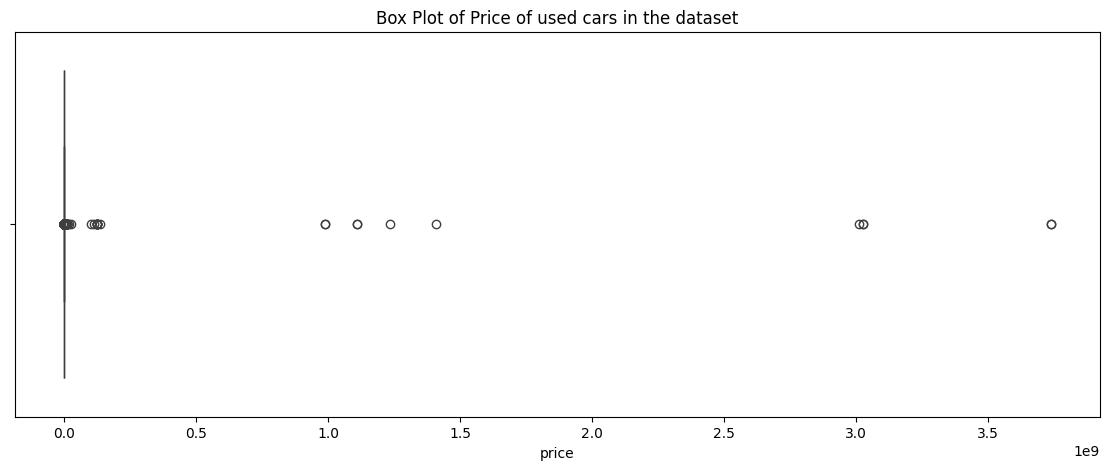

In [13]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df1,x='price').set(title="Box Plot of Price of used cars in the dataset")

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/873421124.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')


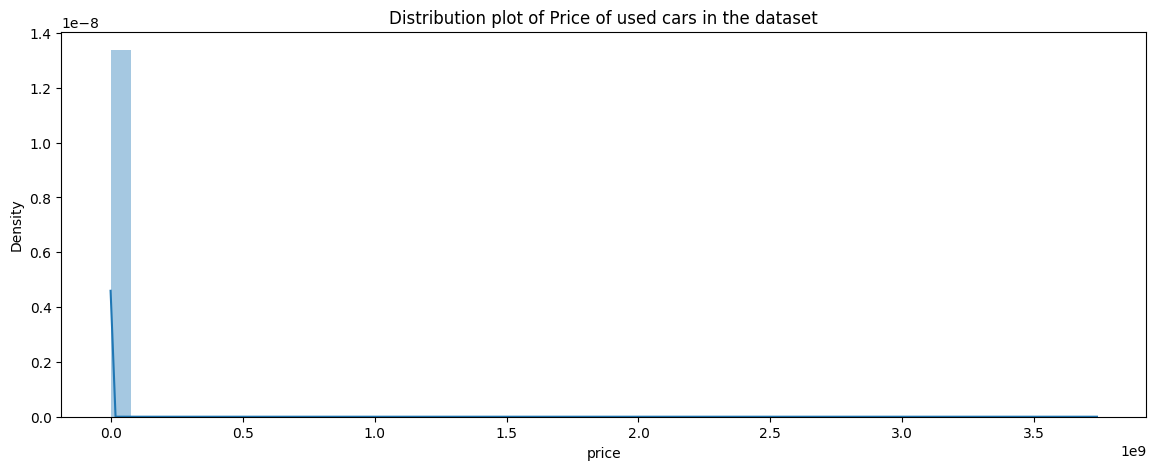

In [14]:
plt.figure(figsize=(14,5))
sns.distplot(df1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

In [15]:
print('Max:', df1['price'].max())
print('Min:', df1['price'].min())
print('Mean:', df1['price'].mean())
print('Std. Dev.:', df1['price'].std())

Max: 3736928711
Min: 0
Mean: 75199.0331873126
Std. Dev.: 12182282.173597954


There are lot of anomonoies there for removing the prices above 100k and 100 

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/1015139058.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')


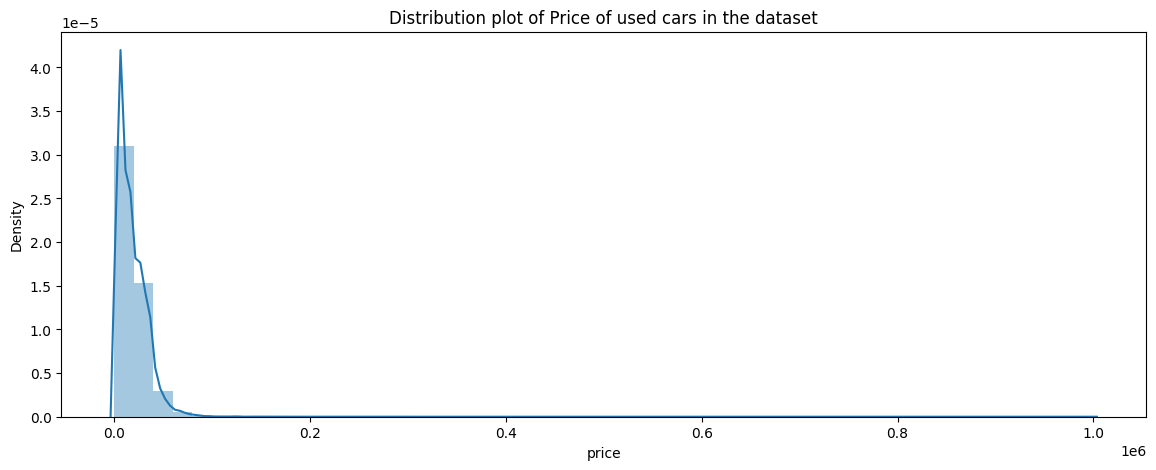

In [16]:
df_price_out1 = df1[(df1['price'] < 1000000) & (df1['price'] > 100)]
plt.figure(figsize=(14,5))
sns.distplot(df_price_out1['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

In [17]:
print('Max:', df_price_out1['price'].max())
print('Min:', df_price_out1['price'].min())
print('Mean:', df_price_out1['price'].mean())
print('Std. Dev.:', df_price_out1['price'].std())

Max: 999999
Min: 101
Mean: 19085.296549198192
Std. Dev.: 15716.472154284424


In [18]:
print("Highest allowed",df_price_out1['price'].mean() + 3*df_price_out1['price'].std())
print("Lowest allowed",df_price_out1['price'].mean() - 3*df_price_out1['price'].std())

Highest allowed 66234.71301205146
Lowest allowed -28064.119913655082


In [20]:
df_price_out2 = df_price_out1[(df_price_out1['price'] < 66234.71301205493) & (df_price_out1['price'] > -28064.11991365854)]

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/23223146.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out2['price']).set(title = 'Distribution plot of Price of used cars in the dataset')


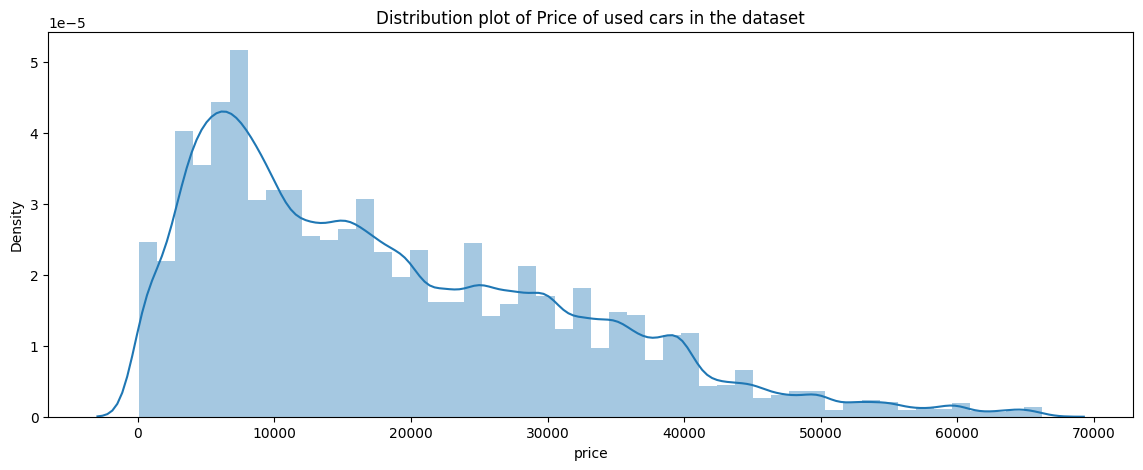

In [22]:
plt.figure(figsize=(14,5))
sns.distplot(df_price_out2['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

Second Itration

In [23]:
# Max, Min, Std dev and Mean value of price in the dataframe df_price_out2
print('Max:', df_price_out2['price'].max())
print('Min:', df_price_out2['price'].min())
print('Mean:', df_price_out2['price'].mean())
print('Std. Dev.:', df_price_out2['price'].std())

Max: 66199
Min: 101
Mean: 18321.505730870547
Std. Dev.: 13351.826427912598


In [24]:
print("Highest allowed",df_price_out2['price'].mean() + 3*df_price_out2['price'].std())
print("Lowest allowed",df_price_out2['price'].mean() - 3*df_price_out2['price'].std())

Highest allowed 58376.98501460833
Lowest allowed -21733.973552867243


/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/642641099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out3['price']).set(title = 'Distribution plot of Price of used cars in the dataset')


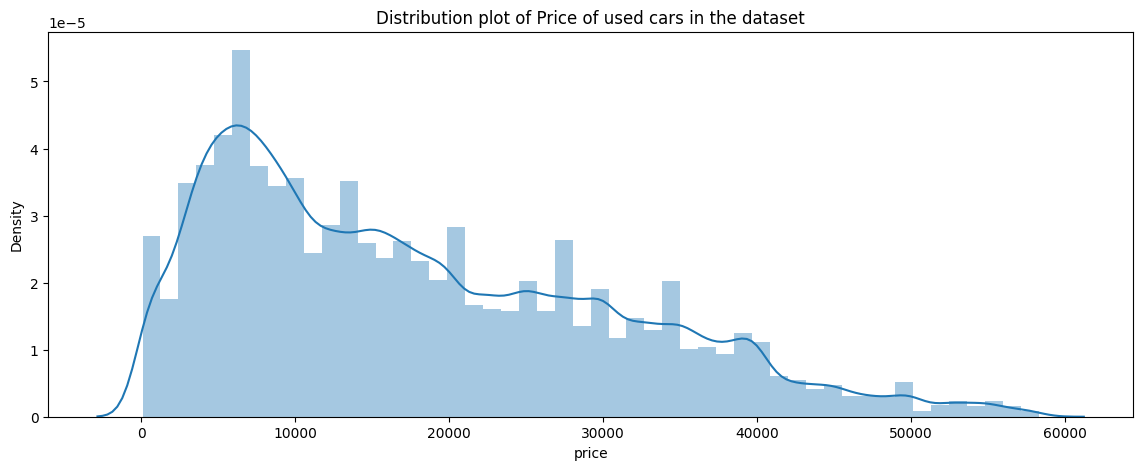

In [25]:
df_price_out3 = df_price_out2[(df_price_out2['price'] < 58376.98501460379) & (df_price_out2['price'] > -21733.973552862702)]
plt.figure(figsize=(14,5))
sns.distplot(df_price_out3['price']).set(title = 'Distribution plot of Price of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Price of used cars in the dataset after eliminating outliers')]

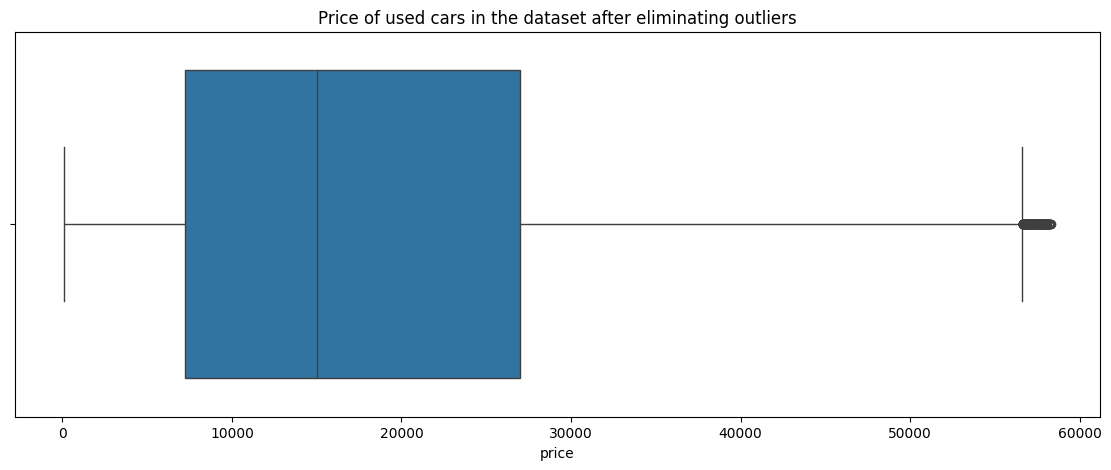

In [26]:
#Box plot
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out3,x='price').set(title="Price of used cars in the dataset after eliminating outliers")

Finding out Year Outliers

[Text(0.5, 1.0, 'Box Plot of Year of used cars in the dataset')]

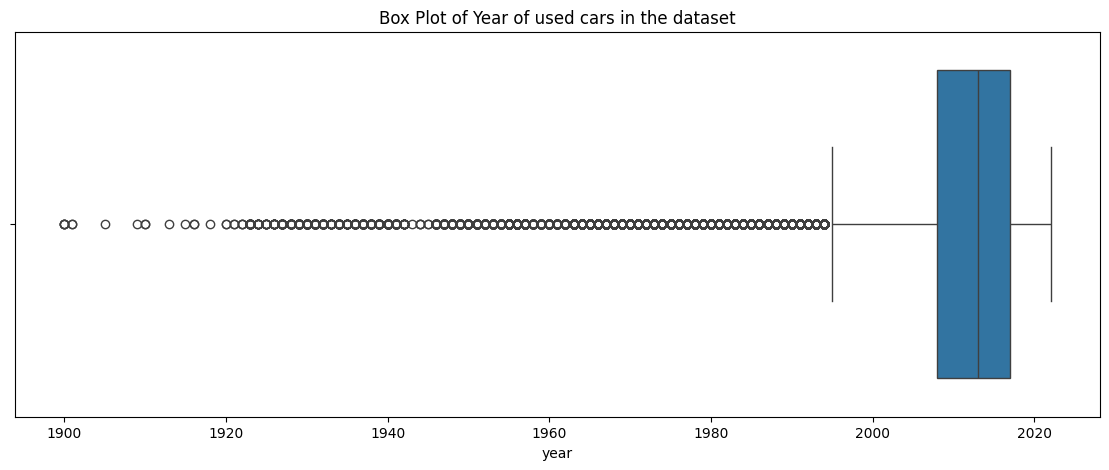

In [27]:
#box plot of 'year' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out3,x='year').set(title="Box Plot of Year of used cars in the dataset")

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/2925697695.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_price_out3['year']).set(title = 'Distribution plot of Year of used cars in the dataset')


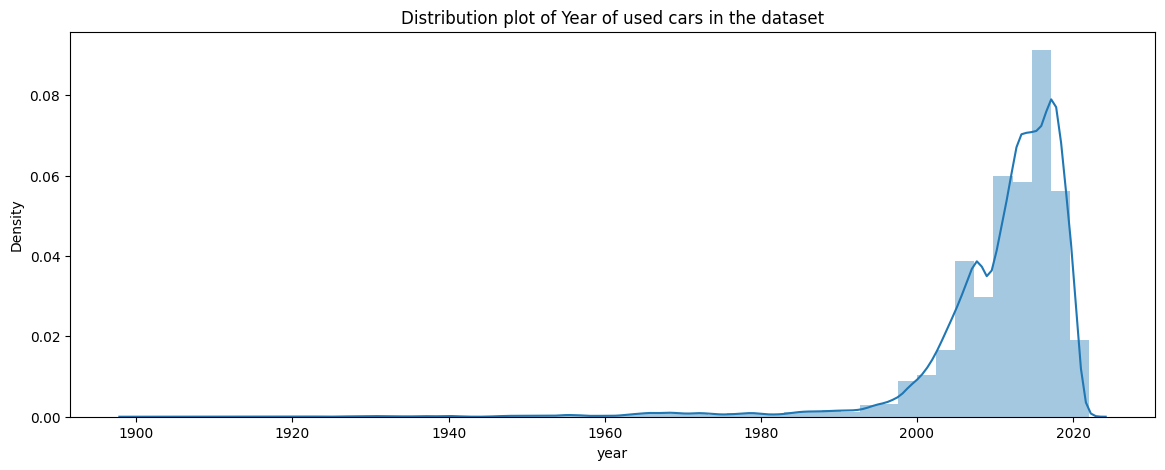

In [28]:
plt.figure(figsize=(14,5))
sns.distplot(df_price_out3['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

In [29]:
print('Max:', df_price_out3['year'].max())
print('Min:', df_price_out3['year'].min())
print('Mean:', df_price_out3['year'].mean())
print('Std. Dev.:', df_price_out3['year'].std())

Max: 2022.0
Min: 1900.0
Mean: 2010.943191344441
Std. Dev.: 9.485539864412653


In [30]:
#Upper and lower bounds for outliers
print("Highest allowed",df_price_out3['year'].mean() + 3*df_price_out3['year'].std())
print("Lowest allowed",df_price_out3['year'].mean() - 3*df_price_out3['year'].std())

Highest allowed 2039.399810937679
Lowest allowed 1982.486571751203


In [31]:
#Drop any observation outside of 3x std. dev. 
df_year_out1 = df_price_out3[(df_price_out3['year'] < 2039.3998109376705) & (df_price_out3['year'] > 1982.4865717512114)]

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/3288616739.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_out1['year']).set(title = 'Distribution plot of Year of used cars in the dataset')


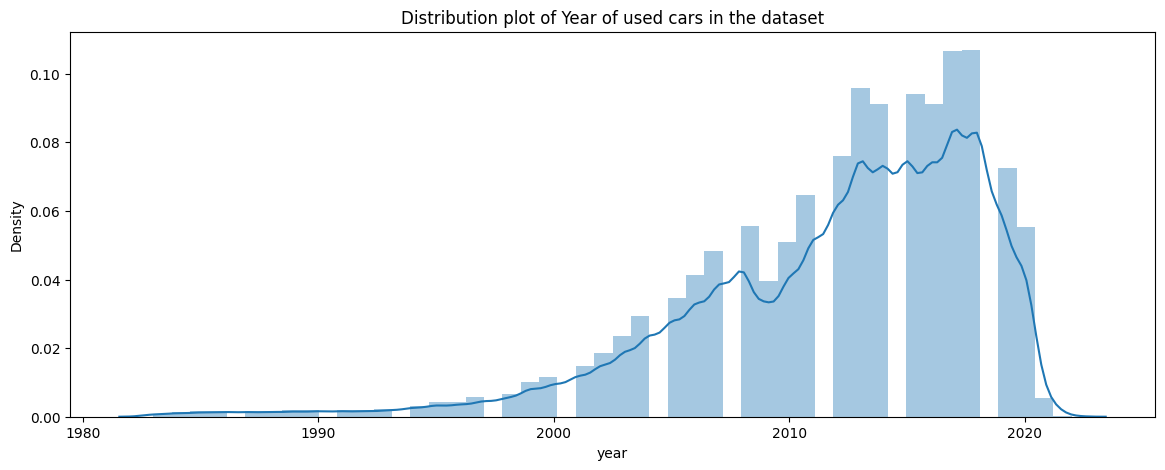

In [32]:
#Distribution plot of the year feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out1['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

Max: 2022.0
Min: 1983.0
Mean: 2011.9760148490984
Highest allowed 2039.399810937679
Lowest allowed 1982.486571751203


/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/4023029239.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_out1['year']).set(title = 'Distribution plot of Year of used cars in the dataset')


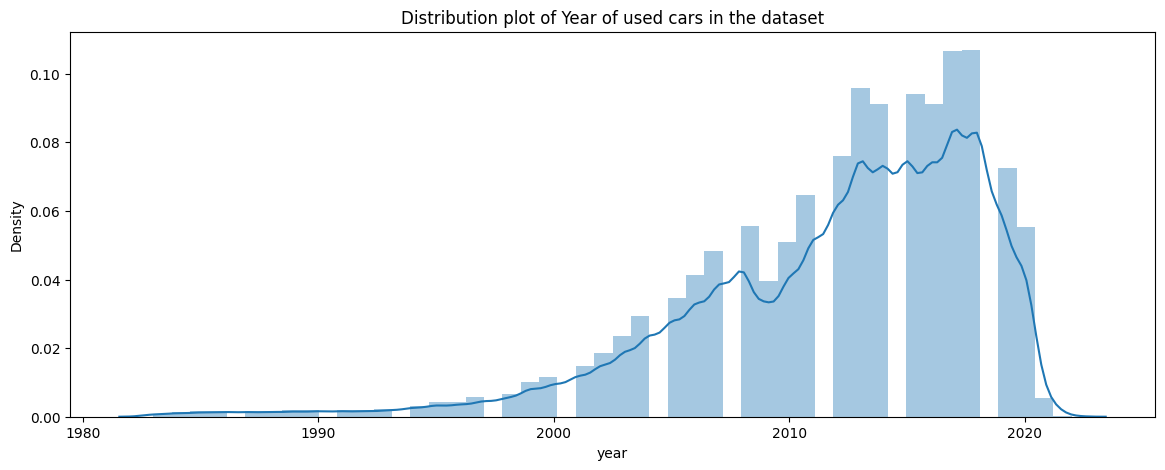

In [33]:
# Maximum, Minimum, Std dev and Mean value of year in the dataframe df1
print('Max:', df_year_out1['year'].max())
print('Min:', df_year_out1['year'].min())
print('Mean:', df_year_out1['year'].mean())

print("Highest allowed",df_price_out3['year'].mean() + 3*df_price_out3['year'].std())
print("Lowest allowed",df_price_out3['year'].mean() - 3*df_price_out3['year'].std())

df_year_out1 = df_price_out3[(df_price_out3['year'] < 2039.3998109376705) & (df_price_out3['year'] > 1982.4865717512114)]
plt.figure(figsize=(14,5))
sns.distplot(df_year_out1['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

Max: 2022.0
Min: 1983.0
Mean: 2011.9760148490984
Std. Dev.: 6.258242912539867
Highest allowed 2030.750743586718
Lowest allowed 1993.2012861114788


/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/2628956176.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_out2['year']).set(title = 'Distribution plot of Year of used cars in the dataset')


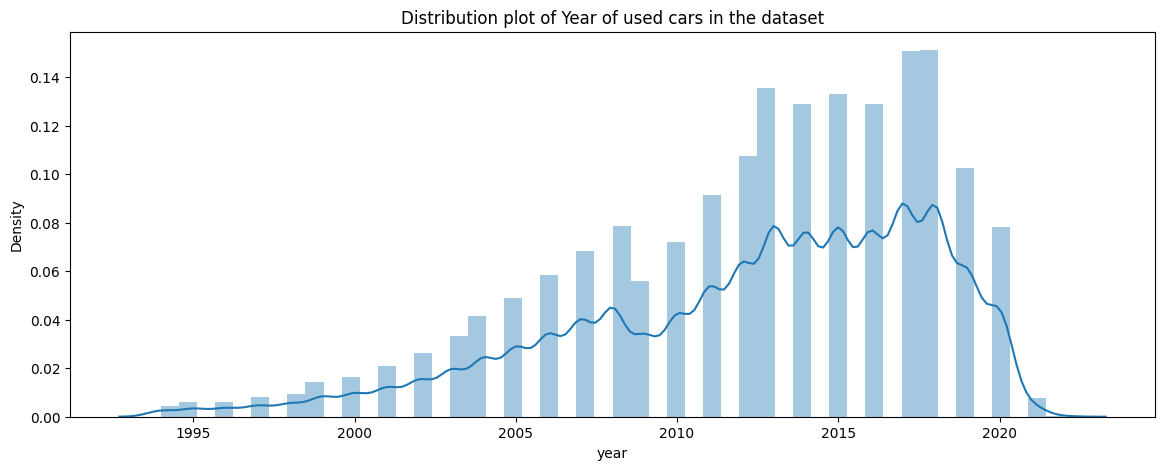

In [34]:
print('Max:', df_year_out1['year'].max())
print('Min:', df_year_out1['year'].min())
print('Mean:', df_year_out1['year'].mean())
print('Std. Dev.:', df_year_out1['year'].std())
print("Highest allowed",df_year_out1['year'].mean() + 3*df_year_out1['year'].std())
print("Lowest allowed",df_year_out1['year'].mean() - 3*df_year_out1['year'].std())
df_year_out2 = df_year_out1[(df_year_out1['year'] < 2030.7507435867042) & (df_year_out1['year'] > 1993.2012861114927)]
plt.figure(figsize=(14,5))
sns.distplot(df_year_out2['year']).set(title = 'Distribution plot of Year of used cars in the dataset')
plt.show()

[Text(0.5, 1.0, 'Box Plot of Year of used cars in the dataset after eliminating outliers')]

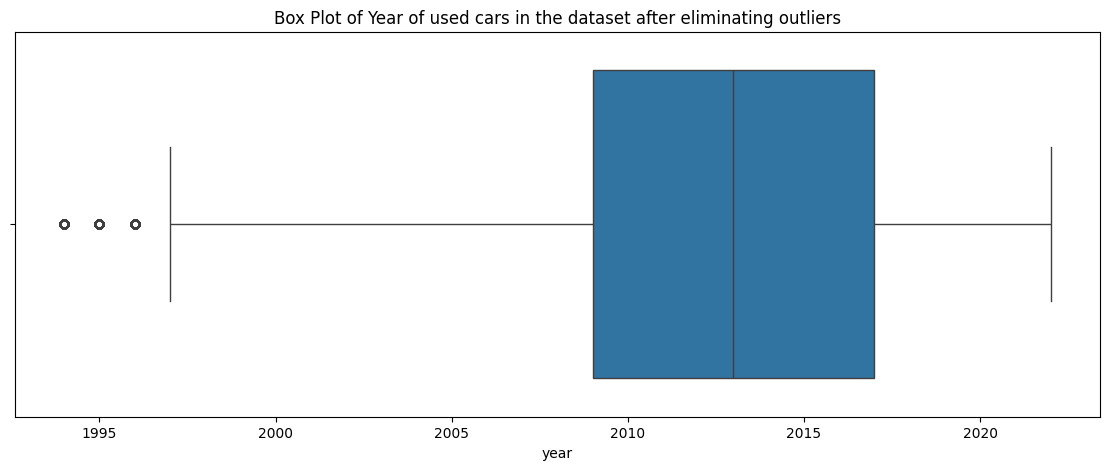

In [35]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df_year_out2,x='year').set(title="Box Plot of Year of used cars in the dataset after eliminating outliers")


In [36]:
df_year_out2.shape

(367753, 14)

Finding out the Odometer Outlier

[Text(0.5, 1.0, 'Box Plot of odometer of used cars in the dataset')]

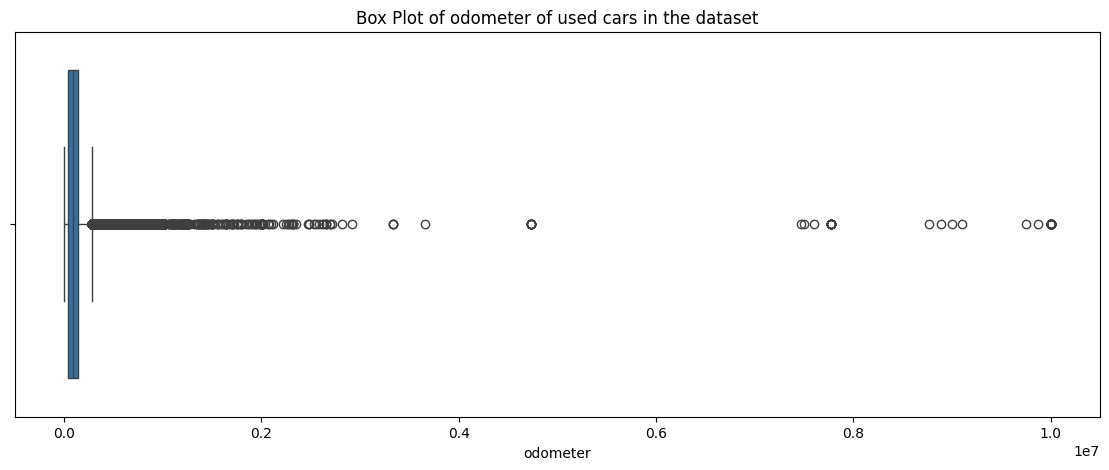

In [37]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df_year_out2,x='odometer').set(title="Box Plot of odometer of used cars in the dataset")

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/581504426.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_year_out2['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')


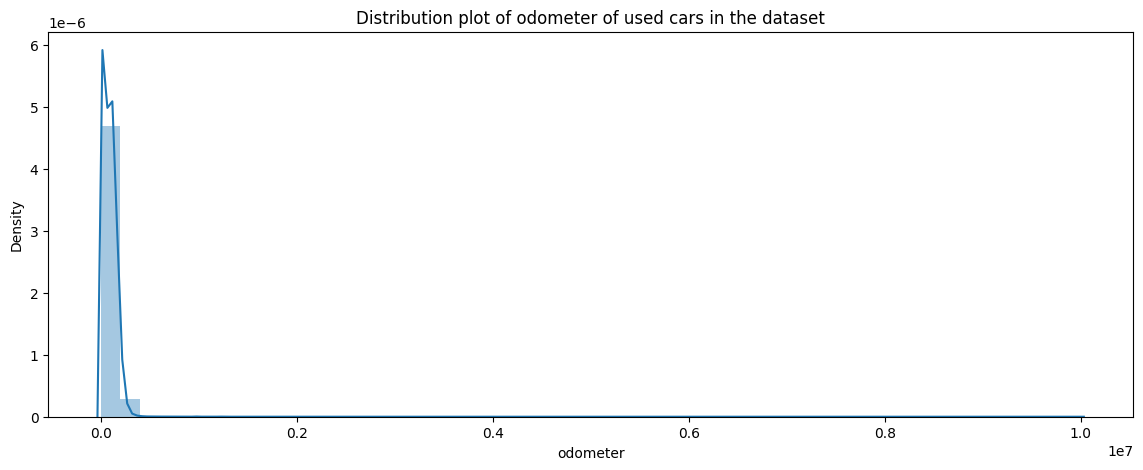

In [38]:
#Distribution plot of the odometer feature
plt.figure(figsize=(14,5))
sns.distplot(df_year_out2['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

In [39]:
#Drop any observation outside of 500 000km 
df_odom_out1 = df_year_out2[(df_year_out2['odometer'] < 500000)]

Iteration 1: Odometer outliers

Max: 499232.0
Min: 0.0
Mean: 94257.75668585526
Highest allowed 285233.64302115544
Lowest allowed -96718.12964944493


/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/2586660922.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_odom_out2['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')


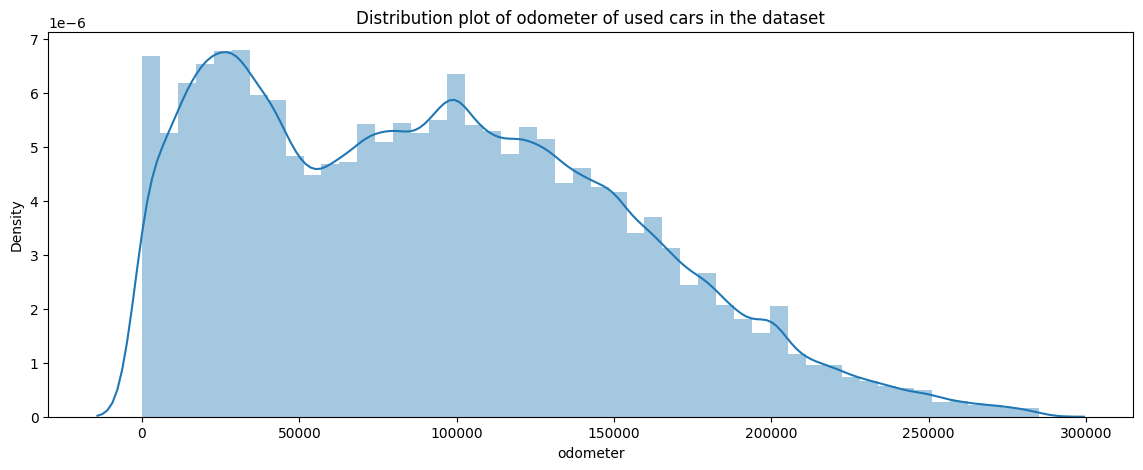

In [40]:
print('Max:', df_odom_out1['odometer'].max())
print('Min:', df_odom_out1['odometer'].min())
print('Mean:', df_odom_out1['odometer'].mean())
print("Highest allowed",df_odom_out1['odometer'].mean() + 3*df_odom_out1['odometer'].std())
print("Lowest allowed",df_odom_out1['odometer'].mean() - 3*df_odom_out1['odometer'].std())
#Drop any observation outside of 3x std. dev. 
df_odom_out2 = df_year_out2[(df_year_out2['odometer'] < 285233.643021149) & (df_year_out2['odometer'] > -96718.12964943847)]

plt.figure(figsize=(14,5))
sns.distplot(df_odom_out2['odometer']).set(title = 'Distribution plot of odometer of used cars in the dataset')
plt.show()

(362610, 14)

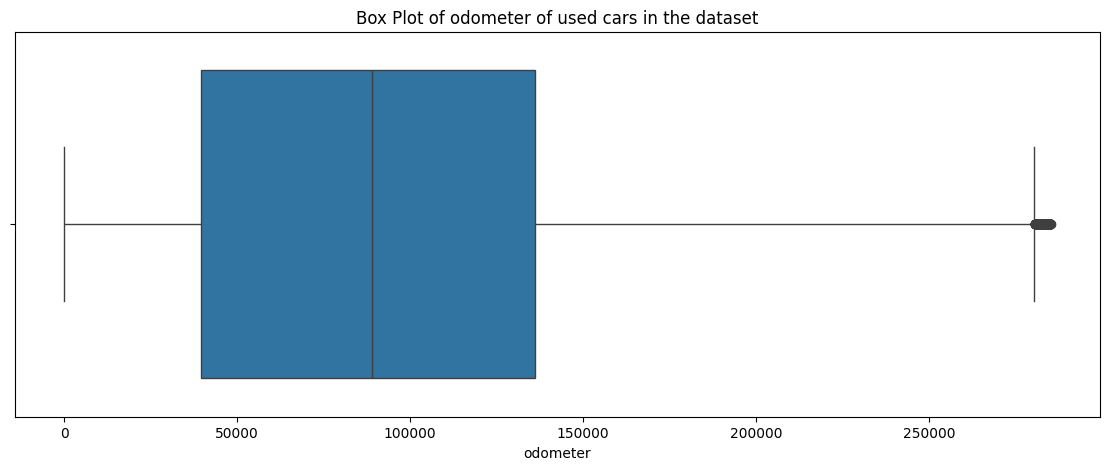

In [41]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df_odom_out2,x='odometer').set(title="Box Plot of odometer of used cars in the dataset")
df_odom_out2.shape

In [42]:
df_outl_clean = df_odom_out2
df_outl_clean.isna().sum()/df_outl_clean.shape[0]*100
df_outl_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362610 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        362610 non-null  object 
 1   price         362610 non-null  int64  
 2   year          362610 non-null  float64
 3   manufacturer  351589 non-null  object 
 4   condition     224648 non-null  object 
 5   cylinders     214340 non-null  object 
 6   fuel          360532 non-null  object 
 7   odometer      362610 non-null  float64
 8   title_status  355630 non-null  object 
 9   transmission  361180 non-null  object 
 10  drive         252335 non-null  object 
 11  type          287436 non-null  object 
 12  paint_color   256498 non-null  object 
 13  state         362610 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 41.5+ MB


In [43]:
df_impute = df_outl_clean
df_impute

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [44]:
#Create a dictionary for the null values according to their percentage
print('Null Value Dictionary:\n')
null_dict = {}
for icol in df_outl_clean.columns.values:
    null_dict[icol] = ((df_outl_clean[icol].isna().sum())/df_outl_clean.shape[0])*100    
print(null_dict)

# sorting the null dictionary based on value
print('\n----------------------\n')
print('Null Value Percentage Dictionary:\n')
sorted_nulldict = {}
sorted_keys = sorted(null_dict, key = null_dict.get)  # [1, 3, 2]

for w in sorted_keys:
    sorted_nulldict[w] = null_dict[w]
print(sorted_nulldict)

Null Value Dictionary:

{'region': np.float64(0.0), 'price': np.float64(0.0), 'year': np.float64(0.0), 'manufacturer': np.float64(3.039353575466755), 'condition': np.float64(38.04693748104024), 'cylinders': np.float64(40.88966106836546), 'fuel': np.float64(0.5730674829706848), 'odometer': np.float64(0.0), 'title_status': np.float64(1.924933123741761), 'transmission': np.float64(0.3943630898210198), 'drive': np.float64(30.41146134965941), 'type': np.float64(20.731364275668074), 'paint_color': np.float64(29.263395935026615), 'state': np.float64(0.0)}

----------------------

Null Value Percentage Dictionary:

{'region': np.float64(0.0), 'price': np.float64(0.0), 'year': np.float64(0.0), 'odometer': np.float64(0.0), 'state': np.float64(0.0), 'transmission': np.float64(0.3943630898210198), 'fuel': np.float64(0.5730674829706848), 'title_status': np.float64(1.924933123741761), 'manufacturer': np.float64(3.039353575466755), 'type': np.float64(20.731364275668074), 'paint_color': np.float64(29.

In [45]:
cat_variables = df_impute[['region', 'manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive',
                          'type', 'paint_color', 'state']]

In [ ]:

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, weights="uniform")
for key in sorted_nulldict:
    if key in ['year','odometer']:
        continue
    if sorted_nulldict[key] > 0 and sorted_nulldict[key]<5:
        if key in cat_variables:
            df_impute[key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])
        else:
            df_impute[key] = imputer.fit_transform(df_impute[key])  

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_63141/1565522389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[key] = df_impute[key].fillna(df_impute[key].mode().iloc[0])


In [47]:
for key in sorted_nulldict:
    if key in ['VIN','size']:
        continue    
    if sorted_nulldict[key]>5 and key in cat_variables:
        df_impute[key] = df_impute[key].fillna('missing')

/var/folders/1c/4bzj7nbj0j56_hrl0nft9h1h0000gp/T/ipykernel_25896/904974666.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_impute[key] = df_impute[key].fillna('missing')


In [48]:
df_impute.head()

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,missing,pickup,white,al
28,auburn,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,missing,pickup,blue,al
29,auburn,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,missing,pickup,red,al
30,auburn,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,missing,pickup,red,al
31,auburn,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,al


In [49]:
df_impute.isna().sum()/df_impute.shape[0]*100

region          0.000000
price           0.000000
year            0.000000
manufacturer    3.039354
condition       0.000000
cylinders       0.000000
fuel            0.573067
odometer        0.000000
title_status    1.924933
transmission    0.394363
drive           0.000000
type            0.000000
paint_color     0.000000
state           0.000000
dtype: float64

In [50]:
df_encode = df_impute.copy()

Lable Encoding

In [51]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
for i in cat_variables:
    df_encode[i] = le.fit_transform(df_impute[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(le_name_mapping)
    print('\n-----------\n')

{'SF bay area': np.int64(0), 'abilene': np.int64(1), 'akron / canton': np.int64(2), 'albany': np.int64(3), 'albuquerque': np.int64(4), 'altoona-johnstown': np.int64(5), 'amarillo': np.int64(6), 'ames': np.int64(7), 'anchorage / mat-su': np.int64(8), 'ann arbor': np.int64(9), 'annapolis': np.int64(10), 'appleton-oshkosh-FDL': np.int64(11), 'asheville': np.int64(12), 'ashtabula': np.int64(13), 'athens': np.int64(14), 'atlanta': np.int64(15), 'auburn': np.int64(16), 'augusta': np.int64(17), 'austin': np.int64(18), 'bakersfield': np.int64(19), 'baltimore': np.int64(20), 'baton rouge': np.int64(21), 'battle creek': np.int64(22), 'beaumont / port arthur': np.int64(23), 'bellingham': np.int64(24), 'bemidji': np.int64(25), 'bend': np.int64(26), 'billings': np.int64(27), 'binghamton': np.int64(28), 'birmingham': np.int64(29), 'bismarck': np.int64(30), 'bloomington': np.int64(31), 'bloomington-normal': np.int64(32), 'boise': np.int64(33), 'boone': np.int64(34), 'boston': np.int64(35), 'boulder':

In [52]:
df_encode

,region,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,16,33590,2014.0,13,2,6,2,57923.0,0,2,2,9,11,1
28,16,22590,2010.0,7,2,6,2,71229.0,0,2,2,9,1,1
29,16,39590,2020.0,7,2,6,2,19160.0,0,2,2,9,9,1
30,16,30990,2017.0,38,2,6,2,41124.0,0,2,2,9,9,1
31,16,15000,2013.0,12,0,5,2,128000.0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,397,23590,2019.0,30,2,5,2,32226.0,0,2,1,10,6,50
426876,397,30590,2020.0,40,2,7,2,12029.0,0,2,1,10,9,50
426877,397,34990,2020.0,6,2,7,0,4174.0,0,2,2,4,11,50
426878,397,28990,2018.0,22,2,5,2,30112.0,0,2,1,10,10,50


Data Understanding More

In [ ]:
df_final = df_encode.copy()
fig = sns.countplot(df_final.cylinders)
fig.title.set_text("Distribution of Cylinder of Cars")

In [ ]:
sample_cars = df_final[['price', 'year','odometer', 'transmission','type']]
sample_cars = sample_cars.sample(n = 10000, random_state =1)
sample_cars

In [ ]:
sns.pairplot(sample_cars, hue = 'type')

In [ ]:
#2nd Sample for features of 'price', 'manufacturer','cylinders', 'fuel','title_status','condition'
sample_cars2 = df_final[['price', 'manufacturer','cylinders', 'fuel','title_status','condition']]
sample_cars2 = sample_cars2.sample(n = 10000, random_state =1)
sample_cars2

In [ ]:
#pairplot
sns.pairplot(sample_cars2, hue = 'condition')

In [ ]:
#Third Sample for features of 'price', 'region','drive', 'paint_color','state'
sample_cars3 = df_final[['price', 'region','drive', 'paint_color','state']]
sample_cars3 = sample_cars3.sample(n = 10000, random_state =1)
sample_cars3

In [ ]:
#pairplot
sns.pairplot(sample_cars3, hue = 'drive')

In [ ]:
#HeatMap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_final.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

#regression

In [ ]:
# split the data into training data and develoment data using 

X = df_final.drop(columns = ['price'])
y = df_final['price']
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)

In [ ]:
X_train

## Linear Regression

In [ ]:
#Building a pipeline for the linear regression

Linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])


#Perform Linear regression on the data

Linear_pipe.fit(X_train, y_train)
train_predict=Linear_pipe.predict(X_train)
test_predict=Linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)



#Check
linear_coefs = Linear_pipe.named_steps['linear'].coef_
print(Linear_pipe)
print(linear_coefs)  

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

##### Polynomial Regression 2

In [ ]:
#Building a pipeline for the polynomial regression

Poly2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly2_pipe.fit(X_train, y_train)
train_predict=Poly2_pipe.predict(X_train)
test_predict=Poly2_pipe.predict(X_test)


#Regression Error
Poly2_train_mse = mean_squared_error(train_predict, y_train)
Poly2_test_mse = mean_squared_error(test_predict, y_test)
Poly2_train_mae = mean_absolute_error(train_predict, y_train)
Poly2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly2_coefs = Poly2_pipe.named_steps['linear'].coef_
print(Poly2_pipe)
print(Poly2_coefs)  

print(f"Polynomial Degree 2 Model: train_mse={Poly2_train_mse}, test_mse={Poly2_test_mse}")
print(f"Polynomial Degree 2 Model: train_mae={Poly2_train_mae}, test_mae={Poly2_test_mae}")
print(Poly2_pipe.score(X_test, y_test))

In [ ]:
#Building a pipeline for the polynomial regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3_pipe.fit(X_train, y_train)
train_predict=Poly3_pipe.predict(X_train)
test_predict=Poly3_pipe.predict(X_test)


#Regression Error
Poly3_train_mse = mean_squared_error(train_predict, y_train)
Poly3_test_mse = mean_squared_error(test_predict, y_test)
Poly3_train_mae = mean_absolute_error(train_predict, y_train)
Poly3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly3_coefs = Poly3_pipe.named_steps['linear'].coef_
print(Poly3_pipe)
print(Poly3_coefs)  

print(f"Polynomial Degree 3 Model: train_mse={Poly3_train_mse}, test_mse={Poly3_test_mse}")
print(f"Polynomial Degree 3 Model: train_mae={Poly3_train_mae}, test_mae={Poly3_test_mae}")
print(Poly3_pipe.score(X_test, y_test))

##### Polynomial Regression degree 4

In [ ]:
#Building a pipeline for the linear regression

Poly4_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=4, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly4_pipe.fit(X_train, y_train)
train_predict=Poly4_pipe.predict(X_train)
test_predict=Poly4_pipe.predict(X_test)


#Regression Error
Poly4_train_mse = mean_squared_error(train_predict, y_train)
Poly4_test_mse = mean_squared_error(test_predict, y_test)
Poly4_train_mae = mean_absolute_error(train_predict, y_train)
Poly4_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Poly4_coefs = Poly4_pipe.named_steps['linear'].coef_
print(Poly4_pipe)
print(Poly4_coefs)  

print(f"Polynomial Degree 4 Model: train_mse={Poly4_train_mse}, test_mse={Poly4_test_mse}")
print(f"Polynomial Degree 4 Model: train_mae={Poly4_train_mae}, test_mae={Poly4_test_mae}")
print(Poly4_pipe.score(X_test, y_test))

###### Polynomial Regression degree 2 - LASSO

In [ ]:
#We now try using lasso to offer a penalized regression method

Lasso2_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=2, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso2_pipe.fit(X_train, y_train)
train_predict=Lasso2_pipe.predict(X_train)
test_predict=Lasso2_pipe.predict(X_test)


#Regression Error
Lasso2_train_mse = mean_squared_error(train_predict, y_train)
Lasso2_test_mse = mean_squared_error(test_predict, y_test)
Lasso2_train_mae = mean_absolute_error(train_predict, y_train)
Lasso2_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso2_coefs = Lasso2_pipe.named_steps['lasso'].coef_
print(Lasso2_pipe)
print(Lasso2_coefs)  

print(f"Lasso Degree 2 Model: train_mse={Lasso2_train_mse}, test_mse={Lasso2_test_mse}")
print(f"Lasso Degree 2 Model: train_mae={Lasso2_train_mae}, test_mae={Lasso2_test_mae}")
print(Lasso2_pipe.score(X_test, y_test))

#### Polynomial Regression degree 3 - LASSO

In [ ]:
#We now try using lasso to offer a penalized regression method

Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('lasso', Lasso(random_state=42))])

#Perform polynomial regression on the data

Lasso3_pipe =Lasso3_pipe.fit(X_train, y_train)
train_predict=Lasso3_pipe.predict(X_train)
test_predict=Lasso3_pipe.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
Lasso3_coefs = Lasso3_pipe.named_steps['lasso'].coef_
print(Lasso3_pipe)
print(Lasso3_coefs)  

print(f"Lasso Degree 3 Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso Degree 3 Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(Lasso3_pipe.score(X_test, y_test))

##### Polynomial Regression degree 3 - Cross Validation

In [ ]:
#Building a pipeline for the linear regression

Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('linear', LinearRegression())])


#Perform polynomial regression on the data

Poly3 =Poly3_pipe.fit(X_train, y_train)

# Permutation importance
feature_importance_poly3 = {}
r = permutation_importance(Poly3, X_test, y_test , n_repeats=30,random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_test.columns[i]:<8}"
        f"  {r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")
        feature_importance_poly3[X_dev.columns[i]]=r.importances_mean[i]

In [ ]:
Poly3.score(X_test, y_test)

In [ ]:
feature_importance_poly3 = pd.DataFrame(feature_importance_poly3,index=[0]).T
feature_importance_poly3 = feature_importance_poly3.rename(columns={0: "Feature Importance for Polynomial Degree 3"})
feature_importance_poly3

In [ ]:
#Plot Feature importance
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

In [ ]:
#Coefficient Importance

feature_names = Poly3[:-1].get_feature_names_out()

coefs_Poly3 = pd.DataFrame(
    Poly3[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)
coefs_Poly3.sort_values(by=['Coefficients'], ascending=False)

In [ ]:
#plot coefficient importance
coefs_Poly3[abs(coefs_Poly3['Coefficients']) >500].plot.barh(figsize=(16, 11))
plt.title("Polynomial Degree 3 Coefficient Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

###### Ridge Regression

In [ ]:
#Building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('feature_transform', PolynomialFeatures(degree=3, include_bias=False)),
                       ('ridge', Ridge())])


#Perform ridge regression on the data
Ridge3 = Ridge_Poly3_pipe.fit(X_train, y_train)
train_predict=Ridge3.predict(X_train)
test_predict=Ridge3.predict(X_test)


#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(Ridge3)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
print(Ridge3.score(X_test, y_test))

##### GridSearch Ridge

In [ ]:
#Create the alpha parameter dictionary
param_dict = {'ridge__alpha':[1,10,100,1000]}

#GridSearch
Opt_Ridge3 = GridSearchCV(Ridge_Poly3_pipe, param_grid=param_dict)
Opt_Ridge3.fit(X_train, y_train)

In [ ]:
#Use the Ridge to predict
train_predict=Opt_Ridge3.predict(X_train)
test_predict=Opt_Ridge3.predict(X_test)


#Regression Error
Opt_Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Opt_Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Opt_Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Opt_Ridge3_test_mae = mean_absolute_error(test_predict, y_test)



#Check
print(f"Opt_Ridge Degree 3 Model: train_mse={Opt_Ridge3_train_mse}, test_mse={Opt_Ridge3_test_mse}")
print(f"Opt_Ridge Degree 3 Model: train_mae={Opt_Ridge3_train_mae}, test_mae={Opt_Ridge3_test_mae}")
print(Opt_Ridge3.score(X_test, y_test))

best_alpha = Opt_Ridge3.best_params_
best_alpha



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
coefs_Poly3.sort_values(by='Coefficients', ascending = False).head(10)

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [1]:
feature_importance_poly3.plot.barh(figsize=(14, 11))
plt.title("Polynomial Degree 3 model Feature Importance")
plt.axvline(x=0, color=".5")
plt.xlabel("Feature Importance")
plt.subplots_adjust(left=0.3)

NameError: name 'feature_importance_poly3' is not defined